<a href="https://colab.research.google.com/github/JakubSilny/MP2021-22_Silny-Jakub_Umela-inteligence-Podklady-pro-vyuku-UIN/blob/main/NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)   


Mounted at /content/gdrive/


In [ ]:
base_dir = '/content/gdrive/MyDrive/znacky_resized'

In [ ]:
IMAGE_SIZE = 160
BATCH_SIZE = 64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range= 0.2,
    validation_split=0.1,
    horizontal_flip = False
    
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'

   
)


test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

print(train_datagen.labels)
print(train_datagen.class_indices)

Found 626 images belonging to 9 classes.
Found 66 images belonging to 9 classes.
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 7 7 7 7 7 7 7 7 

In [ ]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=256, padding='same', strides=2, kernel_size=3, activation='relu', input_shape=(160,160,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))
cnn.add(tf.keras.layers.Conv2D(filters=128, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))
cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', strides=2, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(9, activation='softmax'))


In [ ]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(train_datagen, epochs=10,validation_data = test_datagen)

Epoch 1/10
10/10 [==============================] - 14s 492ms/step - loss: 1.8888 - accuracy: 0.2780 - val_loss: 1.7247 - val_accuracy: 0.1970
Epoch 2/10
10/10 [==============================] - 5s 486ms/step - loss: 1.5386 - accuracy: 0.4105 - val_loss: 1.5637 - val_accuracy: 0.4848
Epoch 3/10
10/10 [==============================] - 5s 544ms/step - loss: 1.1756 - accuracy: 0.5911 - val_loss: 1.4857 - val_accuracy: 0.4394
Epoch 4/10
10/10 [==============================] - 8s 724ms/step - loss: 0.8845 - accuracy: 0.7077 - val_loss: 1.2705 - val_accuracy: 0.4697
Epoch 5/10
10/10 [==============================] - 5s 487ms/step - loss: 0.6755 - accuracy: 0.7412 - val_loss: 1.3788 - val_accuracy: 0.5758
Epoch 6/10
10/10 [==============================] - 6s 557ms/step - loss: 0.6462 - accuracy: 0.7716 - val_loss: 1.3007 - val_accuracy: 0.5455
Epoch 7/10
10/10 [==============================] - 5s 483ms/step - loss: 0.5554 - accuracy: 0.8259 - val_loss: 1.1005 - val_accuracy: 0.5909
Epoch

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 80, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

kruh


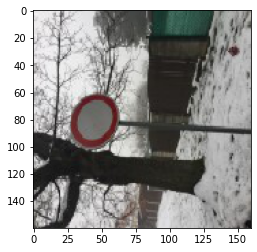

In [ ]:
im_pred=image.load_img(r'/content/gdrive/MyDrive/znacky_resized/kruh/IMG_0570.JPG', target_size=(160,160))
plt.imshow(im_pred)
im_pred=image.img_to_array(im_pred)
im_pred= np.expand_dims(im_pred, axis=0)
result = cnn.predict(im_pred)
for idx, val in enumerate(result[0]):
    
    if val ==1:
      print(list(test_datagen.class_indices.keys())[list(test_datagen.class_indices.values()).index(idx)])

In [ ]:

#y_test_class = np.argmax(correct_indices = np.nonzero(im_pred != test_datagen)[0]
#, axis=1)
y_pred_class = np.argmax(im_pred, axis=1)
print(y_pred_class.shape)


(1, 160, 3)


In [ ]:
result = cnn.predict(im_pred)
print(result[0])
print(train_datagen[0][1][1])

[0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]
